In [52]:
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Load your data
df = pd.read_csv('C:/Users/KseniaLuschevaext/Documents/thesis/synthetic_text_new.csv')
print(f"Total texts: {len(df)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KseniaLuschevaext\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


Total texts: 9916


In [44]:
df.head()

,Unnamed: 0,text,model,length,cleaned_text,processed
0,0,Сегодня мы обсудим загадочные и малоизученные ...,IlyaGusev/saiga_yandexgpt_8b,437.0,Сегодня мы обсудим загадочные и малоизученные ...,сегодня мы обсудить загадочный малоизученный о...
1,1,Рассмотрев современные тенденции развития наук...,IlyaGusev/saiga_yandexgpt_8b,430.0,Рассмотрев современные тенденции развития наук...,рассмотреть современный тенденция развитие нау...
2,2,"Содержание Введение В мире, где каждый нов...",IlyaGusev/saiga_yandexgpt_8b,414.0,"Содержание Введение В мире, где каждый новый...","содержание введение мире, где каждый новый д..."
3,3,Содержание статьи В данной статье будет расс...,IlyaGusev/saiga_yandexgpt_8b,480.0,Содержание статьи В данной статье будет рассм...,содержание статья дать статья быть рассмотрет...
4,4,Сегодня мы наблюдаем за одной из самых значите...,IlyaGusev/saiga_yandexgpt_8b,353.0,Сегодня мы наблюдаем за одной из самых значите...,сегодня мы наблюдать один самый значительный т...


In [45]:
df.iloc[9,4]

'---  Рассмотрим концепцию цифрового бессмертия и её критику Цифровое или виртуальное бессмертие — идея, набирающая популярность среди научных кругов, футурологов и философов XXI века, предполагая возможность сохранения сознания личности после физической смерти путём его загрузки в компьютерную систему. Однако эта концепция не лишена критики. Прежде всего стоит отметить несколько существенных проблем методологического характера, которые подрывают веру во всеобщую приемлемость такой перспективы.  Основные критические аргументы В основной части этой дискуссии возникает ряд важных вопросов относительно возможности полного захвата человеческого разума цифровыми системами. Первое препятствие заключается в сложности понимания того, насколько полно можно воспроизвести человеческое сознание через цифровые технологии. Многие ученые утверждают, что наш мозг представляет собой нечто большее, чем просто набор алгоритмов; он включает эмоции, воспоминания, интуицию и уникальный жизненный опыт – аспе

In [57]:
_stopwords = stopwords.words('russian')

# Add any custom stopwords you want to include
custom_stopwords = [
    # Pronouns
    'я', 'ты', 'он', 'она', 'оно', 'мы', 'вы', 'они',
    'меня', 'тебя', 'его', 'её', 'нас', 'вас', 'их',
    'мне', 'тебе', 'ему', 'ей', 'нам', 'вам', 'им',
    'мной', 'тобой', 'им', 'ей', 'нами', 'вами', 'ими',
    'мой', 'твой', 'его', 'её', 'наш', 'ваш', 'их',
    'моя', 'твоя', 'моё', 'твоё', 'наше', 'ваше',
    'мои', 'твои', 'наши', 'ваши',
    
    # Demonstratives
    'это', 'то', 'такой', 'такая', 'такое', 'такие',
    'этот', 'эта', 'это', 'эти',
    'тот', 'та', 'то', 'те',
    
    # Articles and particles
    'вот', 'уж', 'ли', 'бы', 'же', 'ни',
    
    # Common verbs
    'быть', 'есть', 'был', 'была', 'было', 'были',
    'стать', 'стал', 'стала', 'стало', 'стали',
    'мочь', 'могу', 'можешь', 'может', 'можем', 'можете', 'могут',
    'хотеть', 'хочу', 'хочешь', 'хочет', 'хотим', 'хотите', 'хотят',
    
    # Prepositions
    'в', 'во', 'на', 'с', 'со', 'из', 'из-за', 'из-под',
    'к', 'ко', 'от', 'ото', 'до', 'по', 'под', 'подо',
    'за', 'над', 'перед', 'при', 'про', 'ради', 'сквозь',
    'среди', 'через', 'для', 'без', 'между',
    
    # Conjunctions
    'и', 'а', 'но', 'или', 'либо', 'что', 'чтобы',
    'как', 'когда', 'если', 'потому', 'поэтому',
    'хотя', 'ведь', 'то', 'ни', 'да',
    
    # Common adverbs
    'уже', 'ещё', 'очень', 'можно', 'нужно', 'нельзя',
    'здесь', 'там', 'тут', 'вот', 'вдруг', 'потом',
    'сейчас', 'сегодня', 'завтра', 'вчера', 'всегда',
    'иногда', 'никогда', 'почти', 'тоже', 'только',
    
    # Quantifiers
    'все', 'весь', 'вся', 'всё', 'всего', 'всей',
    'много', 'мало', 'несколько', 'больше', 'меньше',
    'каждый', 'любой', 'никто', 'ничто', 'нечего',
    'некто', 'нечто', 'кто-то', 'что-то', 'свой', 'который',
    'которая','-', '–','—',
    
    # Other common words
    'нет', 'да', 'не', 'ни', 'же', 'ведь', 'вон',
    'просто', 'даже', 'только', 'лишь', 'уж', 'хоть',
    'например', 'вообще', 'особенно', 'примерно',
    'прямо', 'совсем', 'чуть', 'чуть-чуть'
    ]
all_stopwords = set(_stopwords + custom_stopwords)

def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    return ' '.join([word for word in text.split() if word.lower() not in all_stopwords])

df['processed'] = df['processed'].apply(remove_stopwords)

        word_count   char_count  unique_words  word_diversity
count  9916.000000  9916.000000   9916.000000     9916.000000
mean    216.070089  1909.417608    186.538120        0.868394
std      58.649680   544.502275     47.604759        0.047638
min       7.000000    65.000000      7.000000        0.630303
25%     174.000000  1545.000000    154.000000        0.837662
50%     222.000000  1981.000000    194.000000        0.872093
75%     262.000000  2301.000000    223.000000        0.902792
max     443.000000  4041.000000    392.000000        1.000000


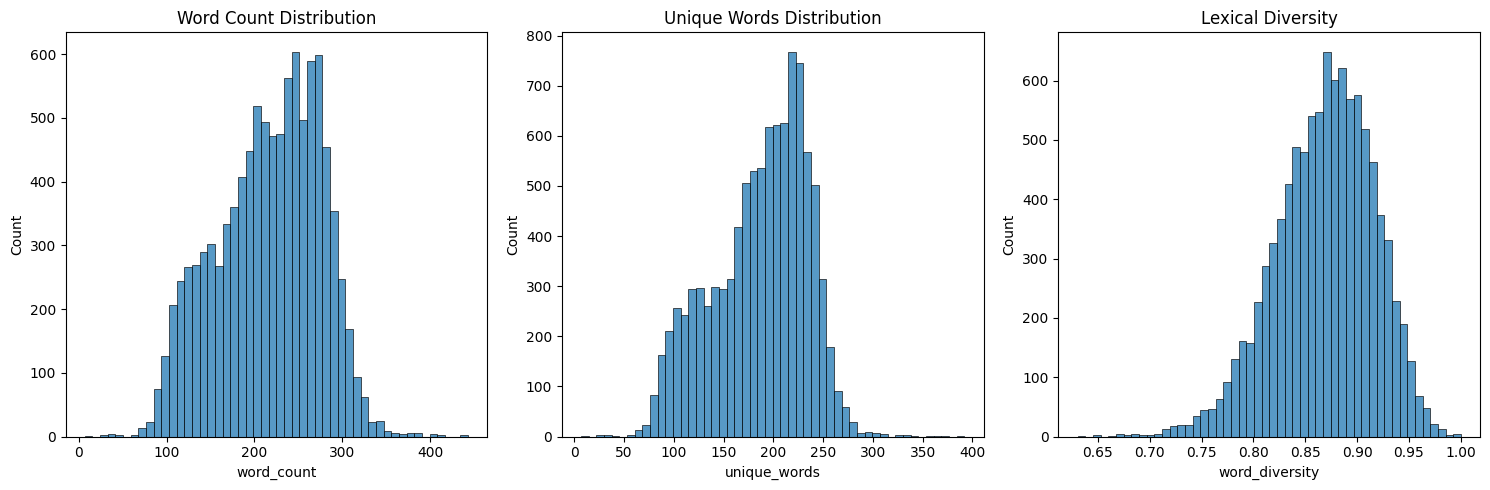

In [58]:
# properties of synthetic texts

df['char_count'] = df['processed'].apply(len)
df['word_count'] = df['processed'].apply(lambda x: len(x.split()))
df['unique_words'] = df['processed'].apply(lambda x: len(set(x.split())))
df['word_diversity'] = df['unique_words'] / df['word_count']

# Display summary stats
print(df[['word_count', 'char_count', 'unique_words', 'word_diversity']].describe())

# Plot distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['word_count'], bins=50)
plt.title('Word Count Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['unique_words'], bins=50)
plt.title('Unique Words Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['word_diversity'], bins=50)
plt.title('Lexical Diversity')
plt.tight_layout()
plt.show()

In [59]:
from collections import Counter
all_words = ' '.join(df['processed'].astype(str)).split()
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

print("Top 20 words after stopword removal:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 20 words after stopword removal:
человек: 16610
новый: 9935
самый: 6369
время: 6177
мир: 6019
жизнь: 5182
большой: 4526
должный: 4467
год: 4423
жить: 4387
язык: 4142
друг: 4093
являться: 4061
иметь: 4003
первый: 3995
технология: 3900
хороший: 3830
том,: 3750
вопрос: 3702
становиться: 3668


In [61]:
df2 = pd.read_csv('C:/Users/KseniaLuschevaext/Documents/thesis/normalized_natural_text.csv')
df2['processed'] = df2['processed'].apply(remove_stopwords)

In [67]:
df2.iloc[10000,1]

'когда захотели избавиться от владимира высоцкого, ему просто отпустили вожжи, и он за несколько лет угробил сам себя на ровном месте. * * * некто артём троицкий ("виктор цой. отвергая соблазны" / журнал "советский экран", № 8, 1990 год): "когда-то давно в ленинграде появились панки. было их немного, десятка три, но энергии и шума хватило, чтобы \'колыбель революции\' содрогнулась. одеты они были вызывающе, вели себя непристойно, дрались и скандалили, пели про неаппетитное (панк-рок! ): про помойки, дохлых гадов и про то, что \'в злобе приятненько жить\'. клички имели соответствующие: пиночет, свинья, осел. самым загадочным персонажем в тусовке был цой (как стало ясно впоследствии, это не кличка) -- молчаливый, отчужденный, исполненный чувства собственного достоинства, одетый в черное. он играл на ритм-гитаре и где-то в канун 1981 года сочинил свою первую песню \'мои друзья всегда идут по жизни маршем\' (могу продолжить: \'и остановки только у пивных ларьков\')." "могу сказать, что пер

         word_count    char_count  unique_words  word_diversity
count  44062.000000  44062.000000  44062.000000    44062.000000
mean     233.375357   2004.597590    200.557986        0.870383
std       82.490514    619.257555     45.879601        0.073990
min        1.000000      7.000000      1.000000        0.047337
25%      194.000000   1659.000000    170.000000        0.844622
50%      232.000000   1989.000000    201.000000        0.884211
75%      267.000000   2305.000000    230.000000        0.915129
max     3689.000000  25123.000000   1349.000000        1.000000


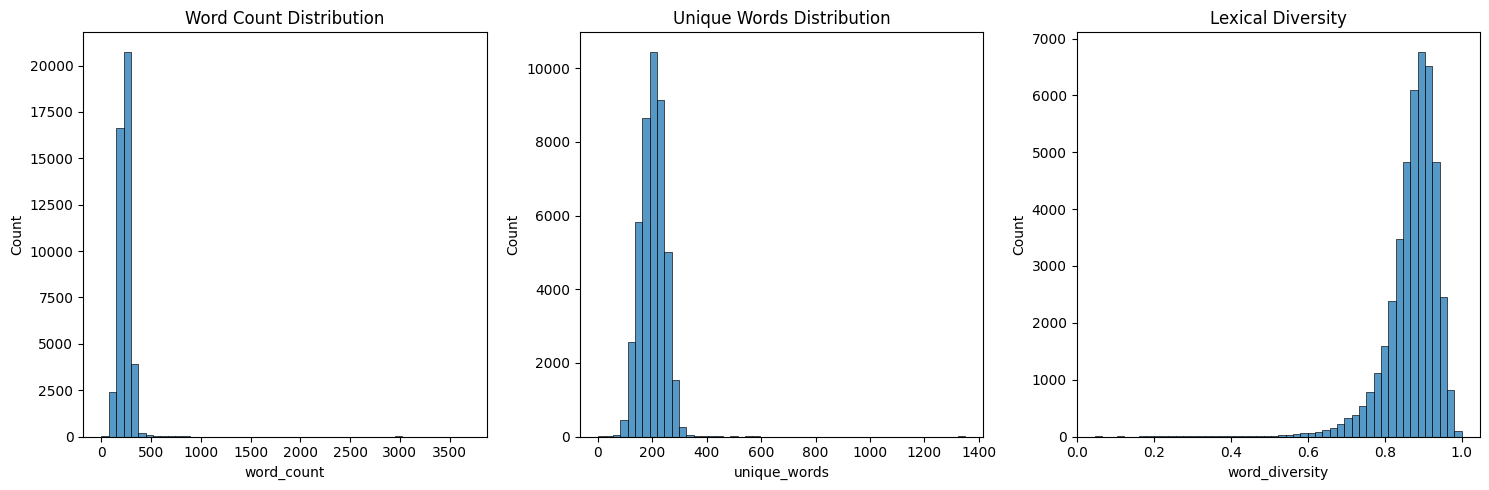

In [73]:
# properties of natural texts

df2['char_count'] = df2['processed'].apply(len)
df2['word_count'] = df2['processed'].apply(lambda x: len(x.split()))
df2['unique_words'] = df2['processed'].apply(lambda x: len(set(x.split())))
df2['word_diversity'] = df2['unique_words'] / df2['word_count']

# Display summary stats
print(df2[['word_count', 'char_count', 'unique_words', 'word_diversity']].describe())

# Plot distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df2['word_count'], bins=50)
plt.title('Word Count Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df2['unique_words'], bins=50)
plt.title('Unique Words Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df2['word_diversity'], bins=50)
plt.title('Lexical Diversity')
plt.tight_layout()
plt.show()